# Plastic Waste to Ocean

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [23]:
plastic_waste_path = "plastic-pollution- Mismanaged plastic waste to ocean per capita (kg per year).csv"

In [24]:
plastic_waste = pd.read_csv(plastic_waste_path)


In [25]:
mismanaged_plastic = pd.DataFrame(plastic_waste)

In [26]:
mismanaged_plastic.rename(columns={'Mismanaged plastic waste to ocean per capita (kg per year)':'Plastics to Ocean (per capita)'},
                         inplace = True)
mismanaged_plastic

,Entity,Code,Year,Plastics to Ocean (per capita)
0,Africa,NaN,2019,0.059823
1,Albania,ALB,2019,0.543214
2,Algeria,DZA,2019,0.134114
3,Angola,AGO,2019,0.027023
4,Antigua and Barbuda,ATG,2019,0.020619
...,...,...,...,...
160,Vietnam,VNM,2019,0.292561
161,Western Sahara,ESH,2019,0.065292
162,World,OWID_WRL,2019,0.126980
163,Yemen,YEM,2019,0.008641


In [27]:
mismanaged_plastic_high = mismanaged_plastic.loc[mismanaged_plastic['Plastics to Ocean (per capita)']>=0.500000,
                                  ['Entity', 'Plastics to Ocean (per capita)']]

mismanaged_plastic_high.head()

,Entity,Plastics to Ocean (per capita)
1,Albania,0.543214
13,Belize,0.958974
36,Dominica,0.736111
37,Dominican Republic,0.584412
38,East Timor,0.552978


In [28]:
sorted_high = mismanaged_plastic_high.sort_values(['Plastics to Ocean (per capita)'], ascending = True)
sorted_high

,Entity,Plastics to Ocean (per capita)
83,Liberia,0.534333
1,Albania,0.543214
38,East Timor,0.552978
37,Dominican Republic,0.584412
62,Haiti,0.615200
126,Saint Vincent and the Grenadines,0.729730
36,Dominica,0.736111
73,Jamaica,0.791723
13,Belize,0.958974
56,Grenada,1.160714


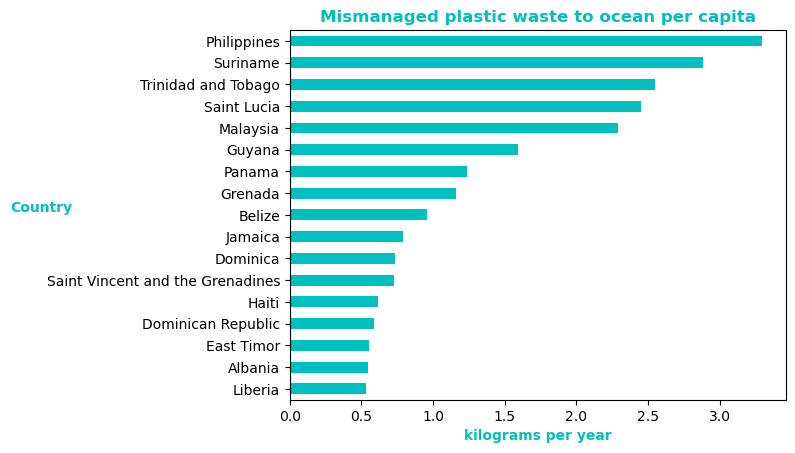

In [29]:
sorted_high.plot(x = 'Entity', y = 'Plastics to Ocean (per capita)', kind='barh', color='c', legend=False)
plt.title('Mismanaged plastic waste to ocean per capita',color= 'c', fontsize='large',fontweight='semibold')

plt.xlabel('kilograms per year',color= 'c',fontweight='semibold')
plt.ylabel('Country',rotation='horizontal',color= 'c',fontweight='semibold')

plt.show()


In [9]:
# Number of countries in study
countries = len(mismanaged_plastic['Entity'].unique())
countries

165

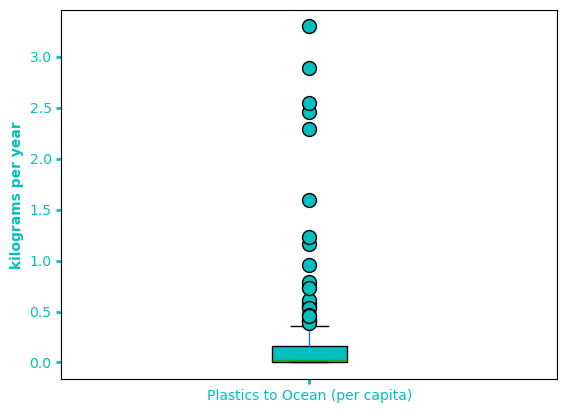

In [10]:
mismanaged_plastic.boxplot(grid = False,column='Plastics to Ocean (per capita)',
                           patch_artist= True,boxprops = dict(facecolor = 'c'),
                           flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'c'})
plt.ylabel('kilograms per year',color= 'c',fontweight='semibold')
plt.tick_params(colors='c', which='both', labelsize='medium', width=2)


# Marine Microplastics
mongoimport --type csv -d plastic_pollution -c ocean_plastics --headerline --drop MarineMicroplastics_oceanwater.csv
mongoimport --type csv -d plastic_pollution -c beach_plastics --headerline --drop MarineMicroplastics_beaches.csv

In [11]:
from pymongo import MongoClient
from pprint import pprint
import folium
from folium.plugins import HeatMap
import requests

In [12]:
microplastics_path = 'MarineMicroplastics_oceanwater.csv'

In [13]:
microplastics = pd.read_csv(microplastics_path)

In [14]:
mongo = MongoClient(port=27017)

In [15]:
[x for x in mongo.list_databases()]

[{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False},
 {'name': 'autosaurus', 'sizeOnDisk': 172032, 'empty': False},
 {'name': 'classDB', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'class_DB', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'config', 'sizeOnDisk': 61440, 'empty': False},
 {'name': 'epa', 'sizeOnDisk': 1540096, 'empty': False},
 {'name': 'local', 'sizeOnDisk': 73728, 'empty': False},
 {'name': 'plastic_pollution', 'sizeOnDisk': 94208, 'empty': False},
 {'name': 'travel_db', 'sizeOnDisk': 81920, 'empty': False},
 {'name': 'uk_food', 'sizeOnDisk': 16879616, 'empty': False}]

In [16]:
plastic_ocean = mongo['plastic_pollution']

In [17]:
print(plastic_ocean.list_collection_names())

['recycled_plastic']


In [18]:
pprint(plastic_ocean.ocean_plastics.find_one())

None


In [19]:
print(plastic_ocean.list_collection_names())

['recycled_plastic']


In [20]:
pprint(plastic_ocean.beach_plastics.find_one())

None


In [21]:
df = pd.read_csv("./Resources/MarineMicroplastics_oceanwater.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Resources/MarineMicroplastics_oceanwater.csv'

In [ ]:
# # Create a map object
# m = folium.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=5)

# # Loop through the DataFrame and add markers
# for index, row in df.iterrows():
#     folium.Marker([row['latitude'],row['longitude']], tooltip=row['mpw']).add_to(m)  

# #Display the map
# m

In [26]:
m = folium.Map(location=(0, 0), zoom_start= 2)
ocean_pollution = pd.read_csv("MarineMicroplastics_oceanwater.csv")

folium.Map(tiles="https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png", 
           attr="Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA))")
folium.circleMarker()
m

In [33]:
m